# EDA on Suicide Rates<br>

  <img src="suicide.jpeg" width="80%" height="20%"><br/><br/>
  ## Table of Contents
1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Importing the dataset.](#section31)<br>
  - 3.2 [ Description of Dataset](#section32)<br>
  - 3.3 [ Pandas Profiling before Data Preprocessing](#section33)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Adding continent to country](#section41)<br>
  - 4.2 [due to high flucuation in data removed data of 2016](#section42)<br>
  - 4.3 [Dropped HDI due to too much missing values](#section43)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**By Global Trend**](#section51)<br>
  - 5.2 [**By Continent**](#section52)<br>
      - 5.2.1 [By Continent?](#section521)<br>
      - 5.2.2 [year wise by continent Trend](#section522)<br>
  - 5.3 [**By Gender**](#section53)<br>
      - 5.3.1 [By Gender Suicide Rate](#section531)<br>
      - 5.3.2 [By Gender year wise trend](#section532)<br>
  - 5.4 [**By Age**](#section54)<br>
      - 5.4.1 [By Age Suicide Rate](#section541)<br>
      - 5.4.2 [By Age year wise trend](#section542)<br>
  - 5.5 [**By Counry wise**](#section55)<br>
  - 5.6 [**Gender distribution per continent**](#section56)<br>
  - 5.7 [**Continent wise suicide Rate by AGE**](#section57)<br>
  - 5.8 [**HeatMAP for our data**](#section58)<br>
  - 5.9 [**does GDP affects suicide rate?**](#section59)<br>
  - 5.10 [**finding the five largest and smallest number of suicides countrywise year gender wise**](#section510)<br>
6. [Exploratory Data Analysis With India](#section6)
  - 6.1 [Explaining Suicides with Only India](#section61)<br>
      - 6.1.1 [Data Preprocessing](#section611)<br>
      - 6.1.2 [Number of Suicides by Type of suicide](#section612)<br>
      - 6.1.3 [Suicide number gender wise](#section613)<br>
      - 6.1.4 [suicide number year wise](#section614)<br>
  - 6.2 [Analysis by merging India Dataset with Overall World Datase](#section62)<br>
      - 6.2.1 [Extracting the GDP and Population from resources](#section621)<br>
      - 6.2.2 [Calculating the GDP and suicides/100k_pop to merge into world dataset](#section622)<br>
      - 6.2.3 [Only 2001 to 2012 data is available for India so fetch only those data from world Data](#section623)<br>
      - 6.2.4 [Merging india dataset with world Dataset](#section624)<br>
           - 6.2.4.1 [Where India Stands in suicide rate?](#section6241)<br>
  - 6.3 [merging unemployement data](#section63)<br>
        - 6.3.1 [Data preprocessing](#section631)<br>
        - 6.3.2 [Merging unemp rate data with suicide_data_with_india](#section632)<br>
        - 6.3.3 [does unemp rate affects suicides?](#section633)<br>
7. [Conclusions](#section7)<br>

<a id=section1></a>
## 1. Problem Statement

Suicide's are going all over world. however we have to prevent this. we have to analyze the reasons. All accross the globe people are  suffering from mental illness, etc. We have to take analysis of it

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

<a id=section3></a>
## 3. Loading Data


In this **Data Visualization** sheet we are using one datasets about **Suicide 1986-2016 data**.

<a id=section31></a>
### 3.1 Importing the dataset.

In [4]:


df_suicide = pd.read_csv('suicide_Data.csv')
df_suicide.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987  male    15-24 years  21           312900       
1  Albania  1987  male    35-54 years  16           308000       
2  Albania  1987  female  15-24 years  14           289700       
3  Albania  1987  male    75+ years    1            21800        
4  Albania  1987  male    25-34 years  9            274300       

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0  6.71               Albania1987 NaN            2,156,624,900       
1  5.19               Albania1987 NaN            2,156,624,900       
2  4.83               Albania1987 NaN            2,156,624,900       
3  4.59               Albania1987 NaN            2,156,624,900       
4  3.28               Albania1987 NaN            2,156,624,900       

   gdp_per_capita ($)       generation  
0  796                 Generation X     
1  796                 Silent           
2  796                 Generation X     
3  796                 G.I. Generation  
4  796                 Boomers

<a id=section32></a>
### 3.2 Description of Dataset

- This is the dataset which is extracted from different countries, years which shows suicide rates, GDP, suicide numbers, Generation Age

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Country                       | Name of country                                               | 
| year                           | year of suicide                                                                | 
| Age                       | Age groups                                              | 
| sex                     | Gender .                                                        | 
| suicides_no                         | Number of suicides                                                    |
| population                        | population.                                                                   |
| suicides/100k pop                      | suicdes per 100k people                                                                 |
| HDI for year                  |  Human Development Index  for year                                                            |
| gdp_for_year                       | GDP in dollar       |
| gdp_per_capita                      | gdp per capita in dollar                                              |
| generation                  | Differrent generations born in different ERA                                                       |

G.I. Generation - born between 1901 - 1927<br>
Silent - born between 1925 - 1942<br>
Boomers - born between 1946 - 1964<br>
Generation X - born between 1960 - 1980<br>
Millennials - born between 1980 - early 2000<br>
Generation Z - born between mid-1990 - 2000s<br>
       
      

In [5]:
df_suicide.info()
df_suicide = df_suicide.rename(columns={' gdp_for_year ($) ':'_gdp_for_year_($)_','gdp_per_capita ($)':'gdp_per_capita_($)','HDI for year':'HDI_for_year', 'suicides/100k pop': 'suicides/100k_pop'})
df_suicide.columns
df_suicide['_gdp_for_year_($)_']=df_suicide['_gdp_for_year_($)_'].str.replace(',','').astype('int64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


- ```info``` function gives us the following insights into the df_suicide dataframe:

  - There are a total of **27820 samples (rows)** and **12 columns** in the dataframe.
  
  - There are **6 columns** with a **numeric** datatype and **6 columns** with an **object** datatype.
  
  - There are **missing** values in the **HDI for year** column.

In [6]:
df_suicide.describe()

year   suicides_no    population  suicides/100k_pop  \
count  27820.000000  27820.000000  2.782000e+04  27820.000000        
mean   2001.258375   242.574407    1.844794e+06  12.816097           
std    8.469055      902.047917    3.911779e+06  18.961511           
min    1985.000000   0.000000      2.780000e+02  0.000000            
25%    1995.000000   3.000000      9.749850e+04  0.920000            
50%    2002.000000   25.000000     4.301500e+05  5.990000            
75%    2008.000000   131.000000    1.486143e+06  16.620000           
max    2016.000000   22338.000000  4.380521e+07  224.970000          

       HDI_for_year  _gdp_for_year_($)_  gdp_per_capita_($)  
count  8364.000000   2.782000e+04        27820.000000        
mean   0.776601      4.455810e+11        16866.464414        
std    0.093367      1.453610e+12        18887.576472        
min    0.483000      4.691962e+07        251.000000          
25%    0.713000      8.985353e+09        3447.000000         
50%    0.779000      4.811469e+10        9372.000000         
75%    0.855000      2.602024e+11        24874.000000        
max    0.944000      1.812071e+13        126352.000000

In [7]:
import pandas_profiling 
import pycountry_convert as pc

<a id=section33></a>
### 3.3 Pandas Profiling before Data Preprocessing

In [8]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

df_suicide.profile_report(title='Pandas Profiling before Data Preprocessing')
# profile.to_file(output_file="suicide_report.html")


<a id=section4></a>
## 4. Data Preprocessing

<a id=section41></a>
### 4.1 Adding continent to country

In [9]:

#adding continent to the countries
def add_conti(data):
    country_code = pc.country_name_to_country_alpha2(data, cn_name_format="default")
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    return continent_name

In [10]:
#data filtering country
df_suicide['country'] = df_suicide['country'].str.replace('Republic of Korea', 'South Korea').replace('Saint Vincent and Grenadines', 'Saint Vincent and the Grenadines')

In [11]:
df_suicide['continent'] = df_suicide['country'].apply(add_conti)
df_suicide.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987  male    15-24 years  21           312900       
1  Albania  1987  male    35-54 years  16           308000       
2  Albania  1987  female  15-24 years  14           289700       
3  Albania  1987  male    75+ years    1            21800        
4  Albania  1987  male    25-34 years  9            274300       

   suicides/100k_pop country-year  HDI_for_year  _gdp_for_year_($)_  \
0  6.71               Albania1987 NaN            2156624900           
1  5.19               Albania1987 NaN            2156624900           
2  4.83               Albania1987 NaN            2156624900           
3  4.59               Albania1987 NaN            2156624900           
4  3.28               Albania1987 NaN            2156624900           

   gdp_per_capita_($)       generation continent  
0  796                 Generation X     EU        
1  796                 Silent           EU        
2  796                 Generation X     EU        
3  796                 G.I. Generation  EU        
4  796                 Boomers          EU

<a id=section42></a>
### 4.2 due to high flucuation in data removed data of 2016

In [12]:

df_suicide = df_suicide.loc[~(df_suicide['year']==2016)]
df_suicide.loc[123,['suicides/100k_pop', 'population', 'suicides_no']]

suicides/100k_pop    7.93  
population           391100
suicides_no          31    
Name: 123, dtype: object

<a id=section43></a>
### 4.3 Dropped HDI due to too much missing values

In [13]:
df_suicide.drop(['HDI_for_year'], axis=1, inplace=True)
df_suicide.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987  male    15-24 years  21           312900       
1  Albania  1987  male    35-54 years  16           308000       
2  Albania  1987  female  15-24 years  14           289700       
3  Albania  1987  male    75+ years    1            21800        
4  Albania  1987  male    25-34 years  9            274300       

   suicides/100k_pop country-year  _gdp_for_year_($)_  gdp_per_capita_($)  \
0  6.71               Albania1987  2156624900          796                  
1  5.19               Albania1987  2156624900          796                  
2  4.83               Albania1987  2156624900          796                  
3  4.59               Albania1987  2156624900          796                  
4  3.28               Albania1987  2156624900          796                  

        generation continent  
0  Generation X     EU        
1  Silent           EU        
2  Generation X     EU        
3  G.I. Generation  EU        
4  Boomers          EU

<a id=section5></a>
## 5. Exploratory Data Analysis

<a id=section51></a>
### 5.1. By Global Trend

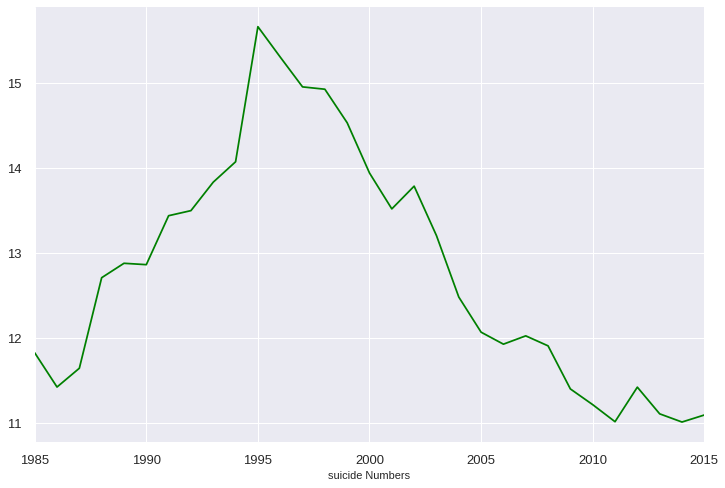

In [14]:
plt.figure(figsize=(20,10))
fig = df_suicide.sort_values(by='year').groupby('year')['suicides/100k_pop'].mean().plot(kind='line', figsize=(12, 8), fontsize=13, color='green')
plt.xlabel('suicide Numbers')
#which year most number of suicides
year = df_suicide.sort_values(by='year').groupby('year')['suicides/100k_pop'].mean()
year.nlargest(5)
fig = fig.get_figure()

fig.savefig("Global-Trend.png")

## insights
1. **Peak Rate** was 15.66 in 1995.
2. after 1995 it started to **decrease**
3. top 5 year where most suicide rate was **1995, 1996,1997,1998,1999**

<a id=section52></a>
### 5.2 By Continent

<a id=section521></a>
### 5.2.1 By Continent

Text(0.5, 1.0, 'Pie chart showing the proportion of overall suicides numbers by continent')

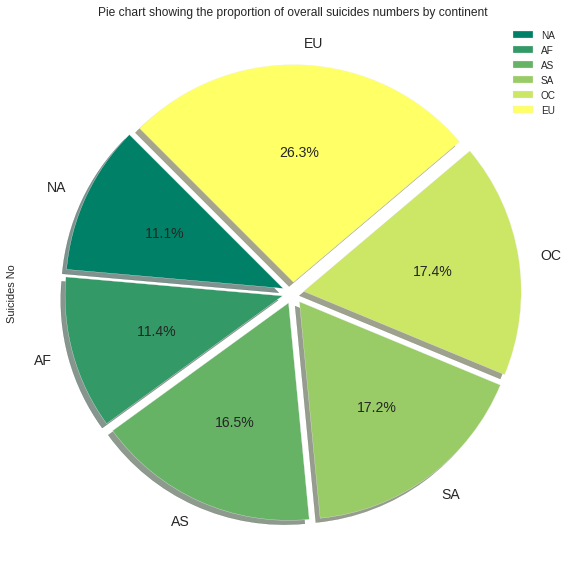

In [15]:
df_suicide.groupby(['continent'])['suicides/100k_pop'].mean().sort_values().plot(kind='pie', explode=[0.05,0.05,0.05,0.05,0.05,0.05,], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Suicides No')
plt.title('Pie chart showing the proportion of overall suicides numbers by continent')

<a id=section522></a>
### 5.2.2 year wise by continent Trend

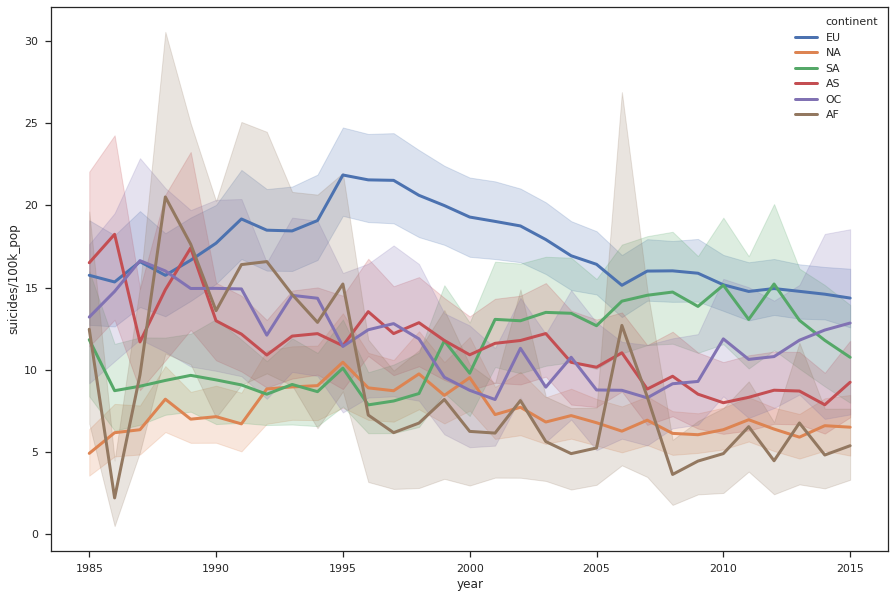

In [16]:
plt.figure(figsize=(15,10))
sns.set(style="ticks", rc={"lines.linewidth": 3})
g = sns.lineplot(x="year", y="suicides/100k_pop", hue="continent", data=df_suicide)

### Insights
- EU line is at the top which means suicide rate is clearly high for it .we can verify it in bar chart
- Africa is having very less suicide rate as compared to others

<a id=section53></a>
### 5.3. By Gender


<a id=section531></a>
### 5.3.1 By Gender Suicide Rate


Text(0.5, 1.0, 'Pie chart showing the proportion of overall suicides numbers by gender')

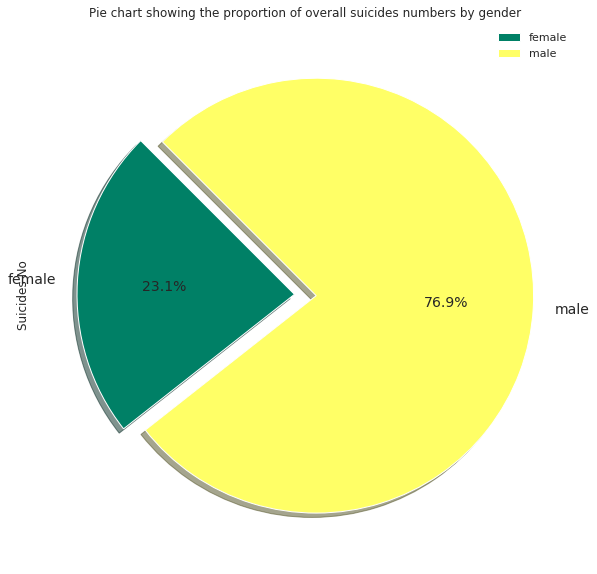

In [17]:
# df_suicide.groupby(['sex'])['suicides_no'].mean().sort_values().plot(kind='barh', figsize=(12,8), fontsize=13, color='red')
df_suicide.groupby(['sex'])['suicides_no'].mean().sort_values().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Suicides No')
plt.title('Pie chart showing the proportion of overall suicides numbers by gender')

<a id=section532></a>
### 5.3.2 By Gender year wise trend


<Figure size 360x360 with 0 Axes>

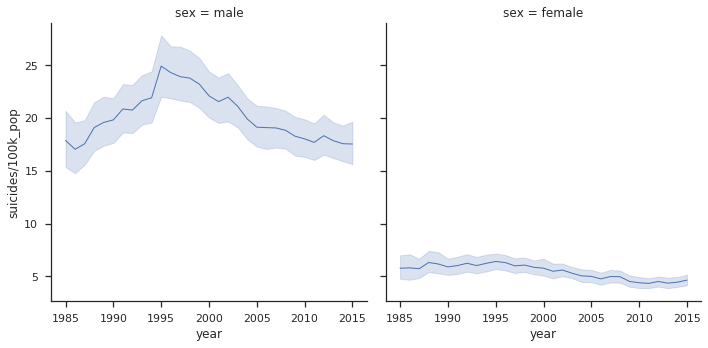

In [18]:
plt.figure(figsize=(5,5))
# plt.setp(l,linewidth=3)
sns.set(style="ticks", rc={"lines.linewidth": 1})
g = sns.relplot(x="year", y="suicides/100k_pop", col="sex", kind='line', data=df_suicide)



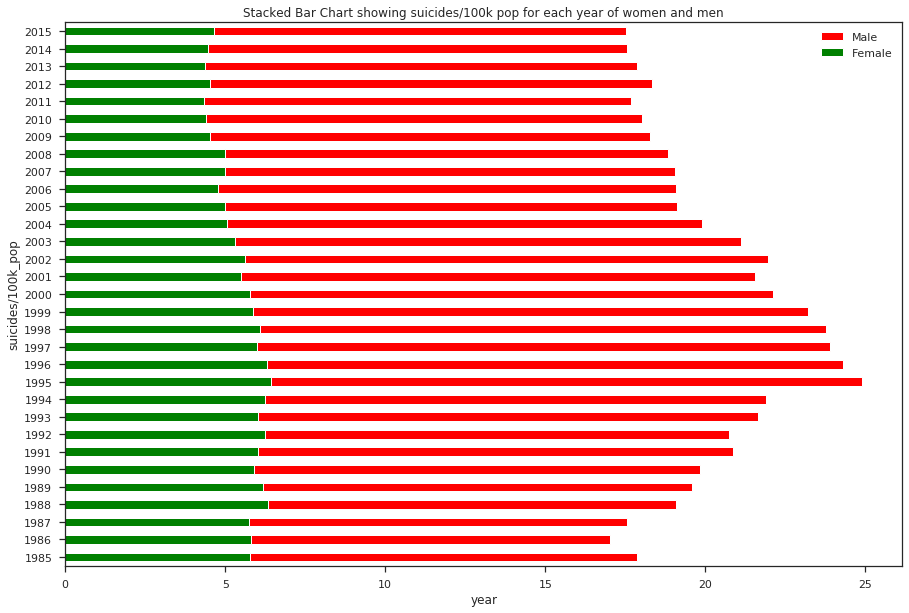

In [19]:

plt.figure(figsize=(15,10))
df_suicide.loc[df_suicide['sex']=='male'].groupby(['year'])['suicides/100k_pop'].mean().plot('barh',color='red')
df_suicide.loc[df_suicide['sex']=='female'].groupby(['year'])['suicides/100k_pop'].mean().plot('barh',color='green')

plt.xlabel('year')
plt.ylabel('suicides/100k_pop')
plt.title('Stacked Bar Chart showing suicides/100k pop for each year of women and men')
plt.legend(labels=('Male', 'Female'))

## insights
Men have greater suicide rate than Females<br>
both suicide rate's started decreasing after 1995


<a id=section54></a>
## 5.4. By Age

<a id=section541></a>
### 5.4.1 By Age Suicide Rate

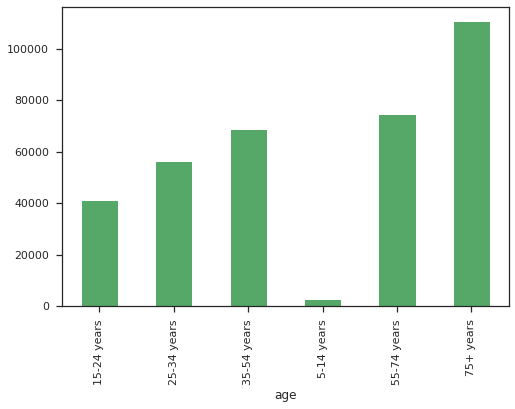

In [20]:
#age group suicide numbers
df_suicide.groupby('age')['suicides/100k_pop'].sum().plot(kind='bar', color='g')

<a id=section542></a>
### 5.4.2 By Age year wise

<Figure size 1080x360 with 0 Axes>

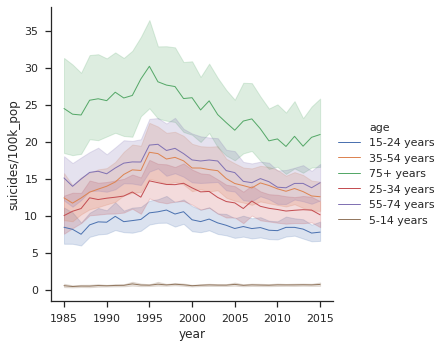

In [21]:
plt.figure(figsize=(15,5))
sns.set(style="ticks", rc={"lines.linewidth": 1})
sns.relplot(x="year", y="suicides/100k_pop", hue="age", kind='line', data=df_suicide)

In [22]:
df_suicide.groupby('age')['suicides/100k_pop'].mean().sort_values()

age
5-14 years     0.620041 
15-24 years    8.957182 
25-34 years    12.199479
35-54 years    14.958887
55-74 years    16.163380
75+ years      23.976614
Name: suicides/100k_pop, dtype: float64

## insights
1. As we can see suicide rates goes increase as the age gets increasing
2. **75+** years have highest peak rate of suicide
3. **5-14** years have highest peak rate of suicide

<a id=section55></a>
### 5.5 BY Countywise wise

In [23]:
data = [go.Choropleth(colorscale='Viridis', autocolorscale=False, locations=sorted(df_suicide['country'].unique()), 
                      locationmode='country names', z=df_suicide.groupby(['country'])['suicides/100k_pop'].mean(), 
                      text='Mean Final Weight', colorbar=go.choropleth.ColorBar(title="Mean Final Weight"), 
                      marker=go.choropleth.Marker(line=go.choropleth.marker.Line(color='rgb(255,255,255)', width=2)))]
layout = go.Layout(title=go.layout.Title(text='Mean of the Final Weight of different Countries'))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

### Insights
1. Lithuania’s rate has been highest by a large margin: > 41 suicides per 100k (per year)
2. Large overrepresentation of European countries with high rates, few with low rates

<a id=section56></a>
### 5.6 Gender distribution per continent

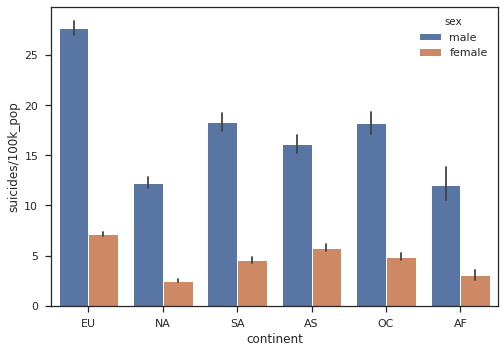

In [24]:
sns.barplot(x='continent', y='suicides/100k_pop', hue='sex', data=df_suicide)

### Insights
- European males/Females have highest rate of suicides
- NA and AF are nearer to each other, the suicide rate is less in those continent

<a id=section57></a>
###  5.7. Continent wise suicide Rate by AGE

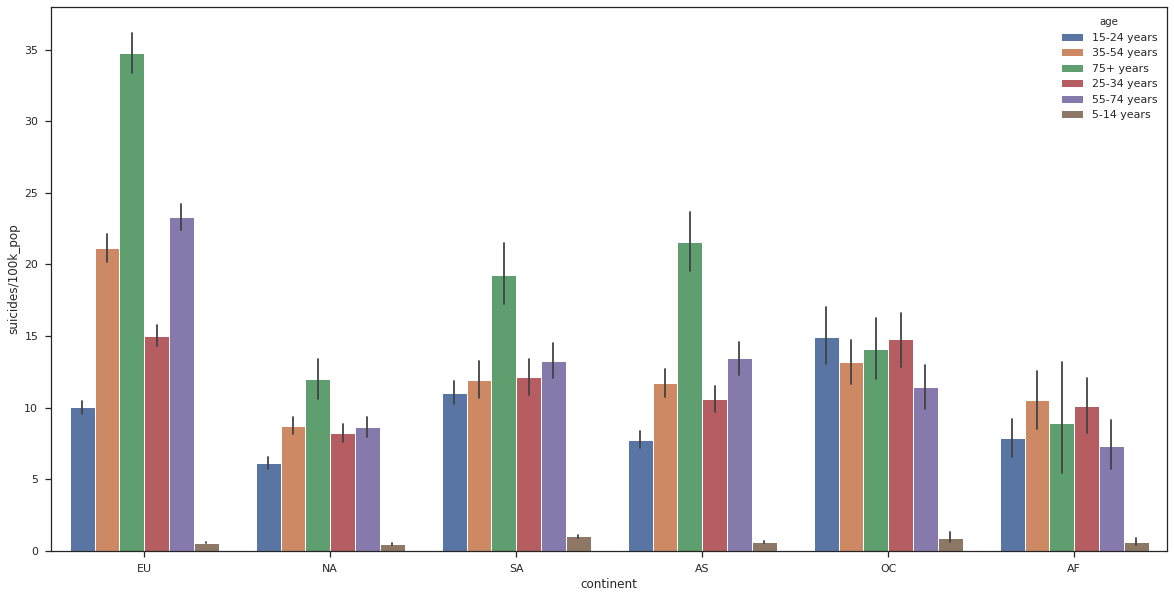

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x='continent', y='suicides/100k_pop', hue='age', data=df_suicide)

### Insights

For the Americas, Asia & Europe (which make up most of the dataset), suicide rate increases with age<br>
Oceania & Africa’s rates are highest for those aged 25 - 34

<a id=section58></a>
### 5.8 HeatMAP for our data

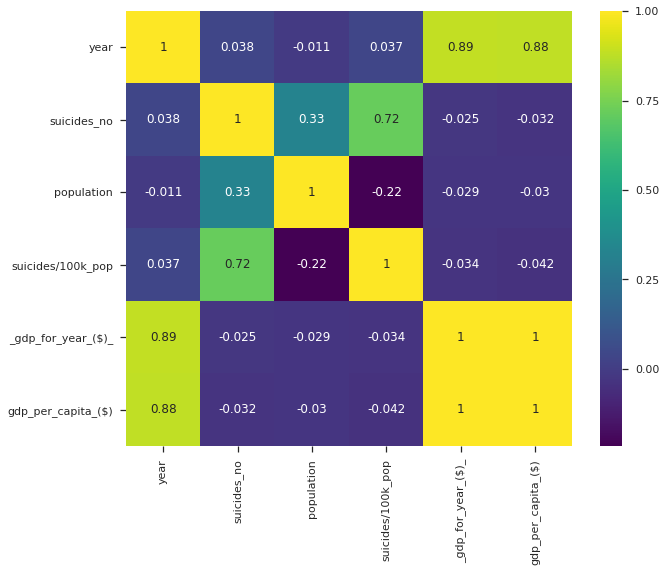

In [26]:
corr_mat = df_suicide.loc[df_suicide['country']=='Albania'].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='viridis')

### Insights
- gdp for year and gdp_per_capita is highly correlated to the year column
- suicide_rate is not related to any column yet

<a id=section59></a>
## 5.9  does GDP affects suicide rate?

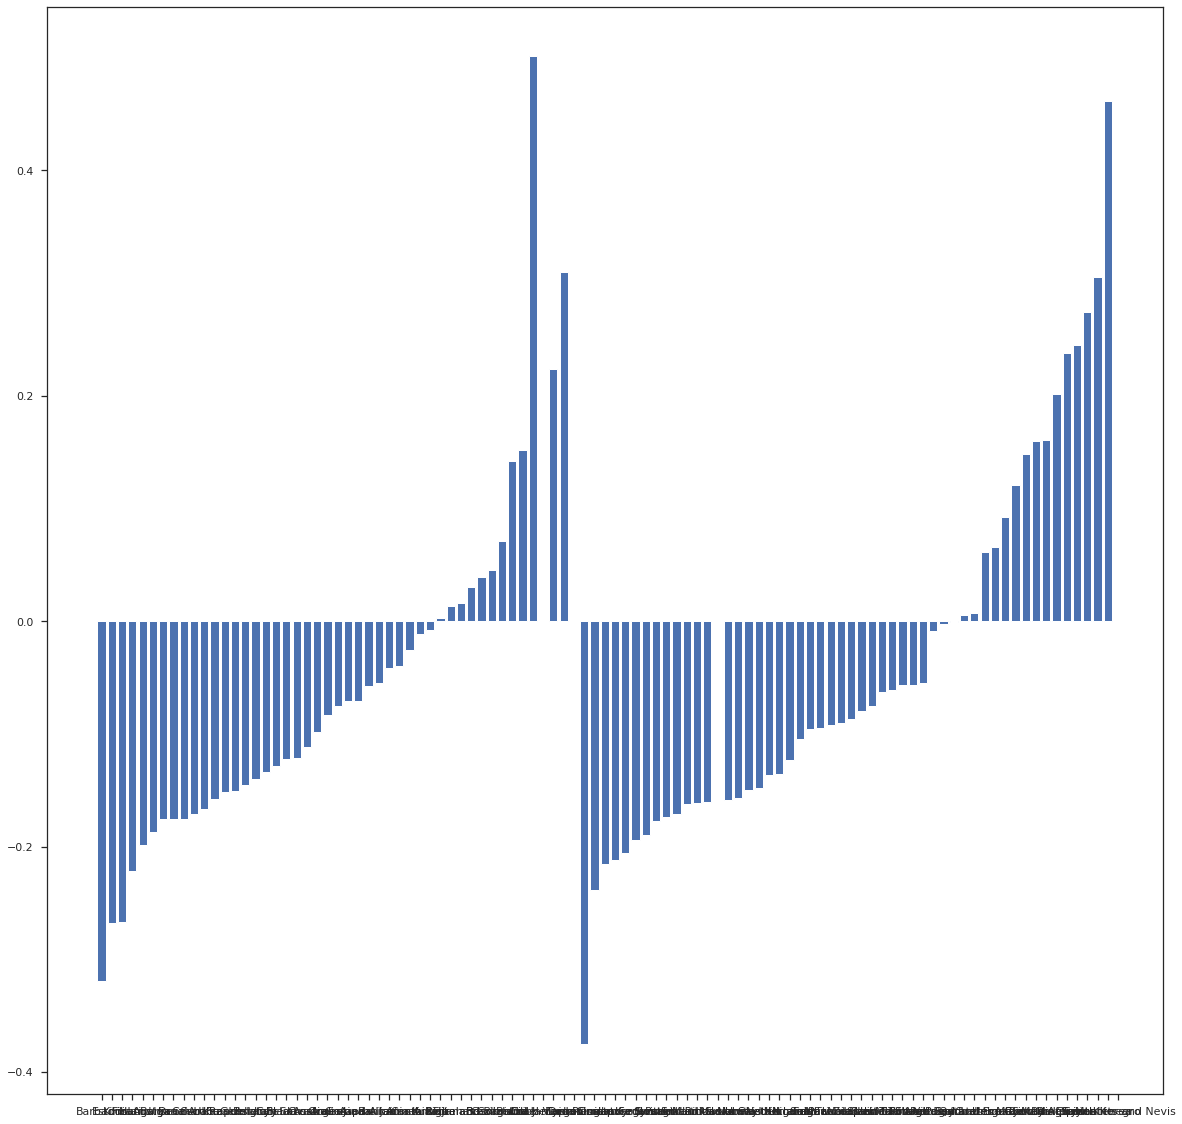

In [27]:
w = df_suicide['country'].unique()
cor = {}
for i in w:
    corr_mat = df_suicide.loc[df_suicide['country']==i].corr()
    cor[i] = corr_mat['gdp_per_capita_($)']['suicides/100k_pop']

#     plt.figure(figsize=(10,8))
# print(sorted(cor.items(), key=lambda kv: kv[1]))
# sns.heatmap(corr_mat, annot=True, cmap='viridis')
# df = df_suicide.loc[df_suicide['country'] == 'Bosnia and Herzegovina']
# w = df.groupby('year')['gdp_per_capita ($)', 'suicides/100k_pop'].mean()
# sns.lineplot(x='gdp_per_capita ($)', y = 'suicides/100k_pop', data=w)
w = sorted(cor.items(), key=lambda x: x[1])
w = dict(w)
plt.figure(figsize=(20,20))
plt.bar(range(len(w)), list(w.values()), align='center')
plt.xticks(range(len(w)), list(w.keys()))
plt.show()

### Insights
- as we can see **Bosnia** is the one who related to the gdp
- Some countries suicide rate is increasing as the GDP grows and decreasing in some counries like **Barbados**

<a id=section510></a>
## 5.10. finding the five largest and smallest  number of suicides countrywise, year, gender wise

country
Russian Federation    1209742
United States         1034013
Japan                 806902 
France                329127 
Ukraine               319950 
Name: suicides_no, dtype: int64

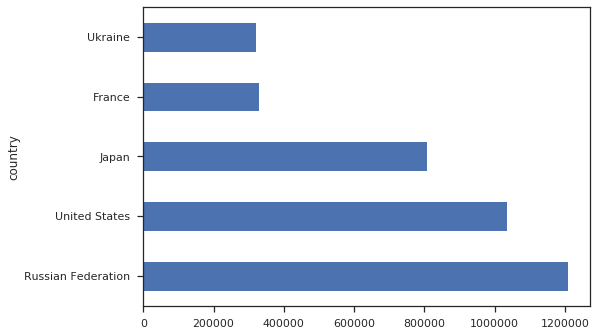

In [28]:
df_suicide.groupby('country')['suicides_no'].sum().nlargest(5).plot('barh')
df_suicide.groupby('country')['suicides_no'].sum().nlargest(5)

country
Dominica                 0 
Saint Kitts and Nevis    0 
San Marino               4 
Antigua and Barbuda      11
Maldives                 20
Name: suicides_no, dtype: int64

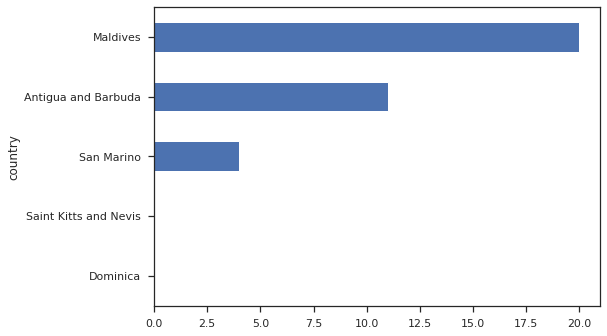

In [29]:
df_suicide.groupby('country')['suicides_no'].sum().nsmallest(5).plot('barh')
df_suicide.groupby('country')['suicides_no'].sum().nsmallest(5)

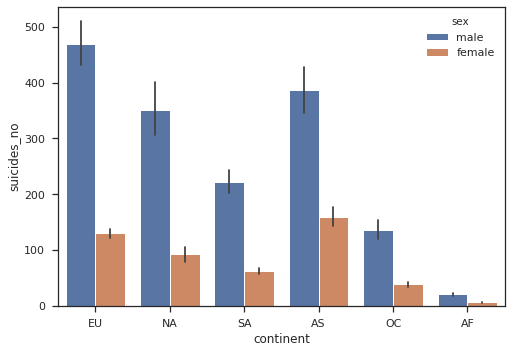

In [30]:
sns.barplot(x='continent', y='suicides_no', hue='sex', data=df_suicide)

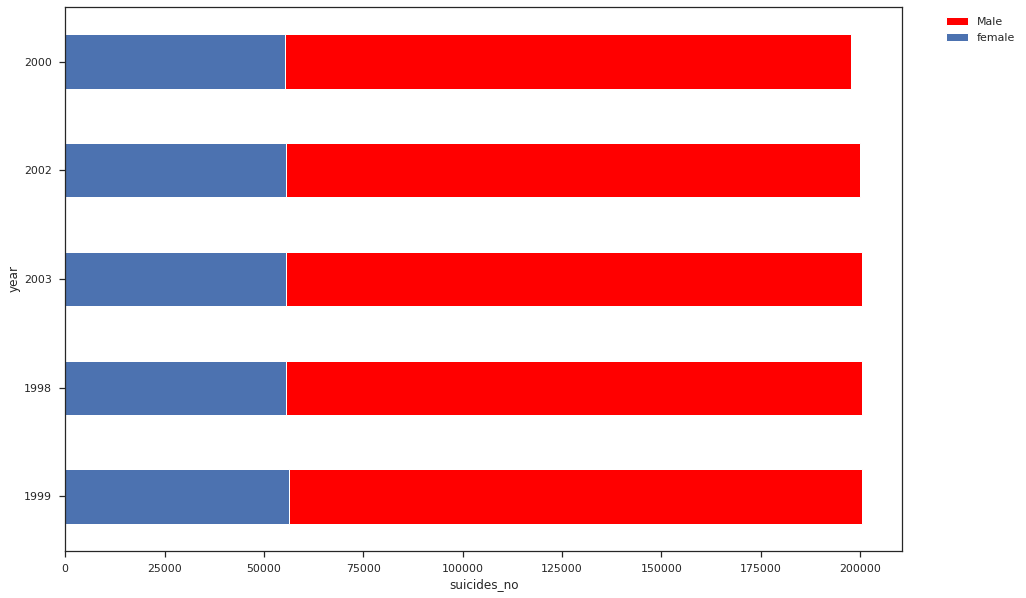

In [31]:
plt.figure(figsize=(15,10))
df_suicide[df_suicide['sex']=='male'].groupby('year')['suicides_no'].sum().nlargest(5).plot('barh', color='red')
w = df_suicide[df_suicide['sex']=='female'].groupby('year')['suicides_no'].sum().nlargest(5).plot('barh')
plt.xlabel('suicides_no')
plt.legend(labels=('Male', 'female'), bbox_to_anchor=(1.04,1), loc="upper left")

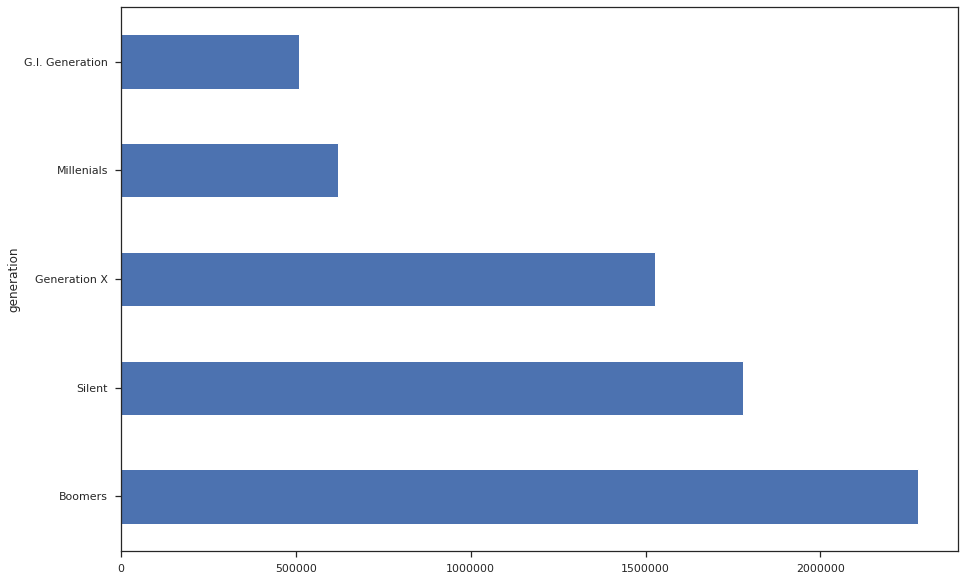

In [32]:
plt.figure(figsize=(15,10))
df_suicide.groupby('generation')['suicides_no'].sum().nlargest(5).plot('barh')

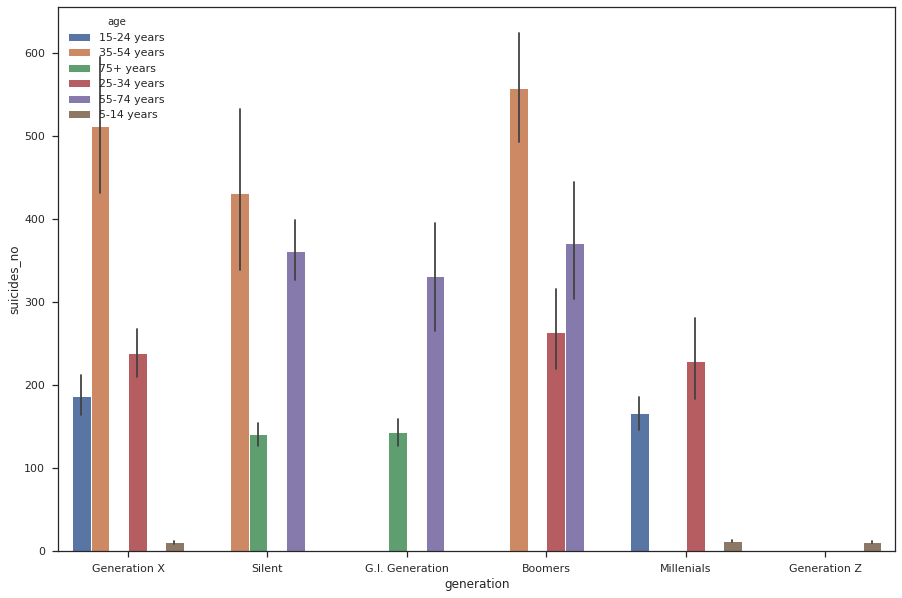

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(x='generation', y='suicides_no', hue='age', data=df_suicide)

<a id=section6></a>
## 6. Exploratory Data Analysis With India


<a id=section61></a>
### 6.1. Explaining Suicides with Only India

<a id=section611></a>
#### 6.1.1. Data Preprocessing

In [34]:
india = pd.read_csv('suicide_india.csv')
india = india.drop(['Age_group'], axis=1)
india.info()
india.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 6 columns):
State        237519 non-null object
Year         237519 non-null int64
Type_code    237519 non-null object
Type         237519 non-null object
Gender       237519 non-null object
Total        237519 non-null int64
dtypes: int64(2), object(4)
memory usage: 10.9+ MB


State  Year Type_code                                     Type  \
0  A & N Islands  2001  Causes    Illness (Aids/STD)                        
1  A & N Islands  2001  Causes    Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001  Causes    Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001  Causes    Physical Abuse (Rape/Incest Etc.)         
4  A & N Islands  2001  Causes    Dowry Dispute                             

   Gender  Total  
0  Female  0      
1  Female  0      
2  Female  0      
3  Female  0      
4  Female  0

<a id=section612></a>
### 6.1.2 Number of Suicides by Type of suicide

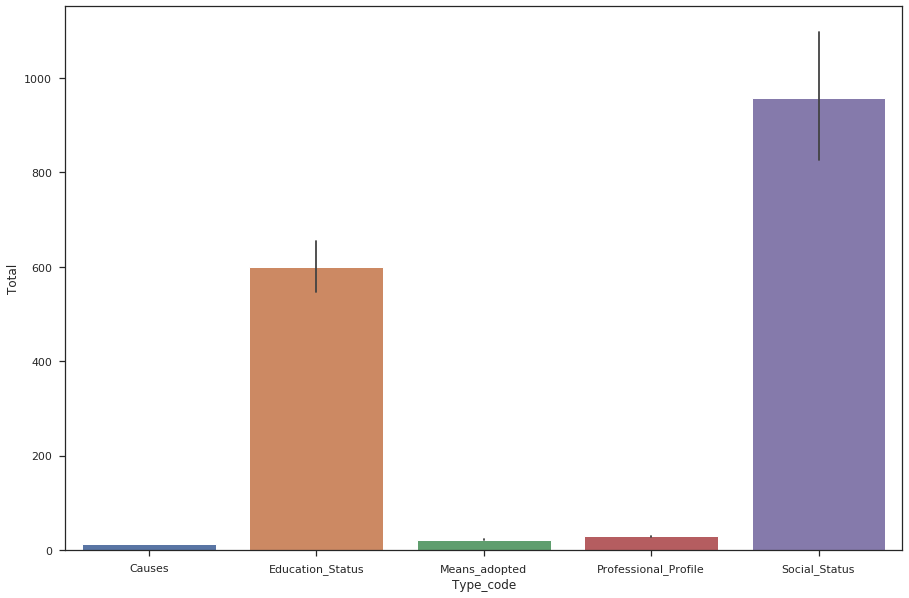

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(x='Type_code', y='Total', data=india)

<a id=section613></a>
### 6.1.3 Suicide number gender wise

Text(0.5, 1.0, 'Pie chart showing the proportion of overall suicides numbers by gender In India')

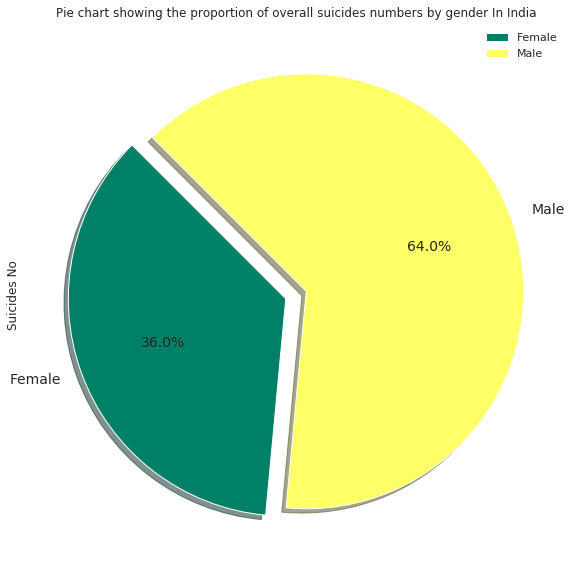

In [36]:
india.groupby(['Gender'])['Total'].mean().sort_values().plot(kind='pie', explode=[0.05,0.05], fontsize=14, autopct='%3.1f%%', 
                                               figsize=(10,10), shadow=True, startangle=135, legend=True, cmap='summer')
plt.ylabel('Suicides No')
plt.title('Pie chart showing the proportion of overall suicides numbers by gender In India')

### Insights
- Male have higher number of suicides in india which is of 64%

<a id=section614></a>
### 6.1.4 suicide number year wise

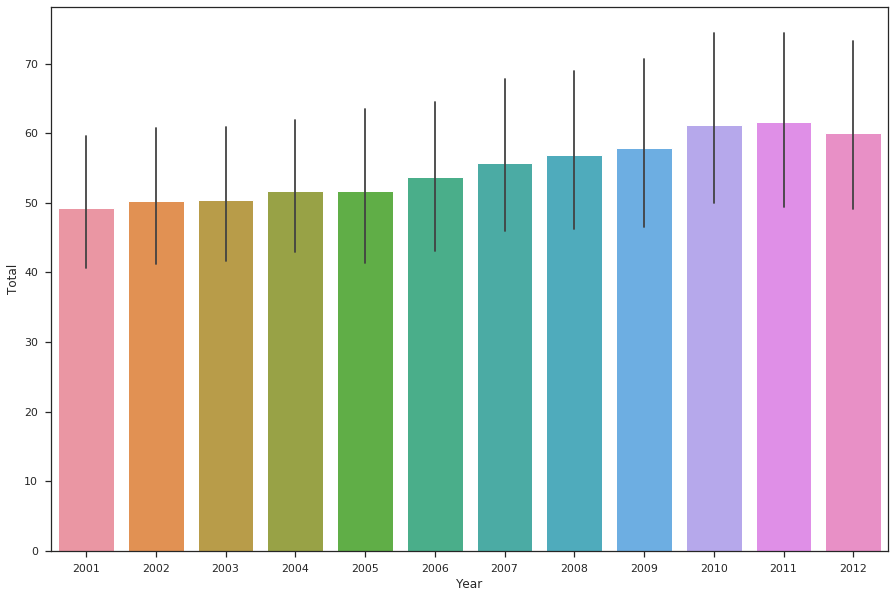

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year', y='Total', data=india)

### Insights-India
- as we can see in 2011 most no. of suicides happended
- in 2010 suicide rate was higher 

<a id=section62></a>
### 6.2 Analysis by merging India Dataset with Overall World Dataset

<a id=section621></a>
### 6.2.1 Extracting the GDP and Population from resources

In [38]:
#GET GDP Data
GDP_data = [485441026156.549,485441026156.549,514937961192.908,514937961192.908,607699299977.15,607699299977.15,709148531774.823,709148531774.823,820381672147.736,820381672147.736,940259892374.501,940259892374.501,1216735426855.47,1216735426855.47,1198895498504.14,1198895498504.14,1341886699393.18,1341886699393.18,1675615312693.42,1675615312693.42,1823049927771.46,1823049927771.46,1827637859135.7,1827637859135.7]
gdp_data = np.array(GDP_data)
population = [1029991000,1029991000,1045845000,1045845000,1049700000,1049700000,1065071000,1065071000,1080264000,1080264000,1095352000,1095352000,1129866000,1129866000,1147996000,1147996000,1166079000,1166079000,1173108000,1173108000,1189173000,1189173000,1205074000,1205074000]


<a id=section622></a>
### 6.2.2 Calculating the GDP and suicides/100k_pop to merge into world dataset

In [39]:
#ADD GDP data
ind = india.groupby(['Year','Gender'])['Total','Gender'].sum()
ind['population'] = population
ind['suicides/100k_pop'] = (ind['Total']/ind['population']* 100000)
ind['_gdp_for_year_($)_'] = gdp_data
ind.reset_index(level=['Year', 'Gender'], inplace=True)
ind['country'] = 'India'
ind = ind.rename(columns={"Gender": "sex", "Year": "year", 'Total':'suicides_no'})
ind.head()

year     sex  suicides_no  population  suicides/100k_pop  \
0  2001  Female  379645       1029991000  36.859060           
1  2001  Male    596819       1029991000  57.944099           
2  2002  Female  369675       1045845000  35.347016           
3  2002  Male    623973       1045845000  59.662091           
4  2003  Female  365657       1049700000  34.834429           

   _gdp_for_year_($)_ country  
0  4.854410e+11        India   
1  4.854410e+11        India   
2  5.149380e+11        India   
3  5.149380e+11        India   
4  6.076993e+11        India

#####  here we have calculated the suicides by divinding population to the total numer of suicides * 100k

<a id=section623></a>
### 6.2.3 Only 2001 to 2012 data is available for India so fetch only those data from world Data

In [40]:
#get data only from 2000 to 2012
df = df_suicide[df_suicide['year'].between(2001,2012, inclusive=True)]
all_over_suicide = df.groupby(['country','year','sex']).agg({'suicides/100k_pop':'mean','_gdp_for_year_($)_':'mean', 'suicides_no':'sum','population':'mean'}).reset_index(level=['country', 'year','sex'])

all_over_suicide.head()
# all_over_suicide['suicides_no'] = df.groupby(['country','year','sex'], as_index=False)['suicides_no'].sum()
# all_over_suicide

country  year     sex  suicides/100k_pop  _gdp_for_year_($)_  suicides_no  \
0  Albania  2001  female  2.733333           4060758804          35            
1  Albania  2001  male    5.703333           4060758804          84            
2  Albania  2002  female  2.788333           4435078648          42            
3  Albania  2002  male    7.630000           4435078648          91            
4  Albania  2003  female  4.866667           5746945913          51            

      population  
0  234788.333333  
1  231769.833333  
2  236456.166667  
3  233350.333333  
4  238612.333333

<a id=section624></a>
### 6.2.4 Merging india dataset with world Dataset

In [41]:
#concat india and all over world data 
suicide_data_with_india = pd.concat([all_over_suicide, ind]).reset_index()
suicide_data_with_india['sex'] = suicide_data_with_india.sex.replace('Female','female').replace('Male','male')
suicide_data_with_india['continent'] = suicide_data_with_india['country'].apply(add_conti)
suicide_data_with_india.head()

index  _gdp_for_year_($)_  country     population     sex  \
0  0      4.060759e+09        Albania  234788.333333  female   
1  1      4.060759e+09        Albania  231769.833333  male     
2  2      4.435079e+09        Albania  236456.166667  female   
3  3      4.435079e+09        Albania  233350.333333  male     
4  4      5.746946e+09        Albania  238612.333333  female   

   suicides/100k_pop  suicides_no  year continent  
0  2.733333           35           2001  EU        
1  5.703333           84           2001  EU        
2  2.788333           42           2002  EU        
3  7.630000           91           2002  EU        
4  4.866667           51           2003  EU

In [42]:
suicide_data_with_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 9 columns):
index                 2080 non-null int64
_gdp_for_year_($)_    2080 non-null float64
country               2080 non-null object
population            2080 non-null float64
sex                   2080 non-null object
suicides/100k_pop     2080 non-null float64
suicides_no           2080 non-null int64
year                  2080 non-null int64
continent             2080 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 146.3+ KB


<a id=section6241></a>
### 6.2.4.1 Where India Stands in suicide rate?

In [43]:
data = [go.Choropleth(colorscale='Cividis', autocolorscale=False, locations=sorted(suicide_data_with_india['country'].unique()), 
                      locationmode='country names', z=suicide_data_with_india.groupby(['country'])['suicides/100k_pop'].mean(), 
                      text='Mean Final Weight', colorbar=go.choropleth.ColorBar(title="Mean Final Weight"), 
                      marker=go.choropleth.Marker(line=go.choropleth.marker.Line(color='rgb(255,255,255)', width=2)))]
layout = go.Layout(title=go.layout.Title(text='Mean of the Final Weight of different Countries'))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')
suicide_data_with_india.groupby(['country'])['suicides/100k_pop'].mean().nlargest(5)

country
India                 48.797348
Lithuania             38.165347
South Korea           37.310764
Russian Federation    32.933056
Belarus               31.150417
Name: suicides/100k_pop, dtype: float64

### insights
- after adding india its clear that india have most suicide rates
- after India as we can see above countries are having most suicide rates

 <a id=section63></a>
## 6.3 merging unemployement data 

<a id=section631></a>
### 6.3.1. Data preprocessing

In [44]:
unemp_rate = pd.read_csv('unemployement_rate.csv')
unemp_rate.head()

Country Name       1991       1992    1993    1994       1995    1996  \
0  Aruba       NaN        NaN        NaN     NaN     NaN        NaN       
1  Afghanistan  2.976000   3.173000   3.463   3.612   3.653000   3.621    
2  Angola       22.601999  20.924999  21.250  21.159  21.148001  20.066   
3  Albania      16.781000  17.653000  17.681  17.527  17.607000  18.358   
4  Andorra     NaN        NaN        NaN     NaN     NaN        NaN       

        1997    1998       1999    2000       2001    2002       2003  \
0 NaN        NaN     NaN        NaN     NaN        NaN     NaN          
1  3.603000   3.536   3.606000   3.517   3.426000   3.550   3.419000    
2  21.465000  20.438  20.896999  22.885  23.115000  23.896  23.924999   
3  18.311001  18.323  18.569000  17.767  17.410999  17.510  17.496000   
4 NaN        NaN     NaN        NaN     NaN        NaN     NaN          

        2004       2005       2006    2007    2008    2009    2010    2011  \
0 NaN        NaN        NaN        NaN     NaN     NaN     NaN     NaN       
1  3.087000   2.942000   2.825000   2.128   2.494   2.470   2.275   1.984    
2  23.643000  20.532000  17.674000  14.633  12.044  10.609  9.089   7.362    
3  17.271999  16.874001  16.393999  15.966  13.060  13.674  14.086  13.481   
4 NaN        NaN        NaN        NaN     NaN     NaN     NaN     NaN       

     2012    2013    2014    2015    2016    2017    2018    2019  
0 NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN      
1  1.692   1.725   1.735   1.679   1.634   1.559   1.542   1.519   
2  7.359   7.454   7.429   7.279   7.281   7.139   7.253   7.246   
3  13.376  15.866  17.490  17.080  15.220  13.750  13.898  13.956  
4 NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN

In [45]:
unemp_rate = pd.read_csv('unemployement_rate.csv')

unemp_rate.rename(columns={'Country Name':'country'}, inplace=True)
unemp_rate
# #used to resolve the names in both the tables
set(suicide_data_with_india.country.unique())-set(unemp_rate['country'])
unemp_rate = unemp_rate.melt(id_vars=["country"], 
        var_name="year", 
        value_name="UNEMP_RATE")
unemp_rate.year = unemp_rate.year.astype(int) 

<a id=section632></a>
### 6.3.2 Merging unemp rate data with suicide_data_with_india

In [46]:
suicide_data_with_india_with_unemp_rate = pd.merge(left=suicide_data_with_india, right=unemp_rate,on=['country', 'year'])
suicide_data_with_india_with_unemp_rate.head()

index  _gdp_for_year_($)_  country     population     sex  \
0  0      4.060759e+09        Albania  234788.333333  female   
1  1      4.060759e+09        Albania  231769.833333  male     
2  2      4.435079e+09        Albania  236456.166667  female   
3  3      4.435079e+09        Albania  233350.333333  male     
4  4      5.746946e+09        Albania  238612.333333  female   

   suicides/100k_pop  suicides_no  year continent  UNEMP_RATE  
0  2.733333           35           2001  EU        17.410999   
1  5.703333           84           2001  EU        17.410999   
2  2.788333           42           2002  EU        17.510000   
3  7.630000           91           2002  EU        17.510000   
4  4.866667           51           2003  EU        17.496000

<a id=section633></a>
### 6.3.3 does unemp rate affects suicides??


UNEMP_RATE  suicides/100k_pop
UNEMP_RATE         1.000000    0.299902         
suicides/100k_pop  0.299902    1.000000

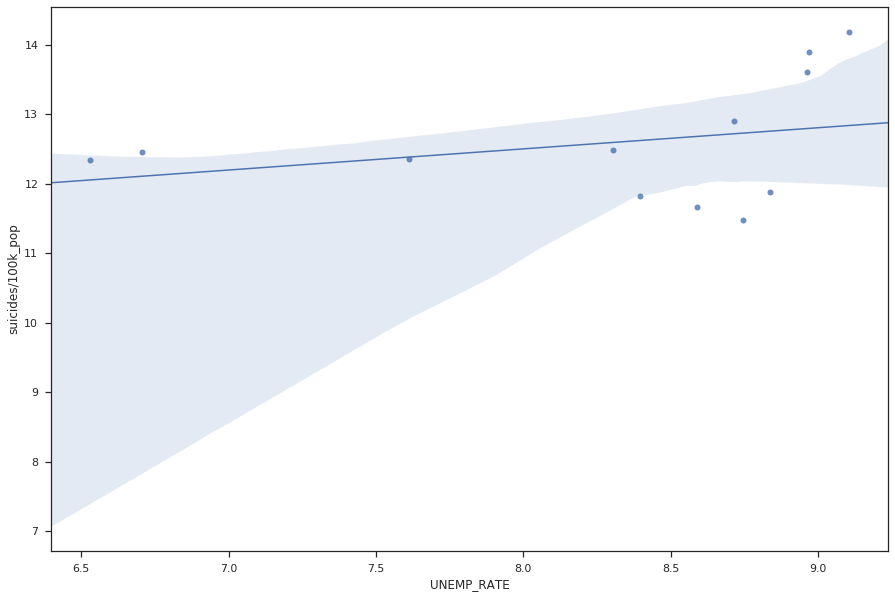

In [47]:
plt.figure(figsize=(15,10))
# plt.setp(l,linewidth=3)
temp = suicide_data_with_india_with_unemp_rate.sort_values(by=['year']).groupby('year')['UNEMP_RATE','suicides/100k_pop'].mean()
sns.regplot(x="UNEMP_RATE", y="suicides/100k_pop", data=temp)
temp.corr()

### Insights 
- as we can see only year by year its increasing
- 0.299902 is so small that we can say here it depends On country


<a id=section67></a>
### 7. Conclusions
- we have seen GDP and UNEMP Rate somehow affects suicide rates in small ratios which we if we improve then 
suicide_rates we can decrease
- we have to focus on the types of suicide in india too